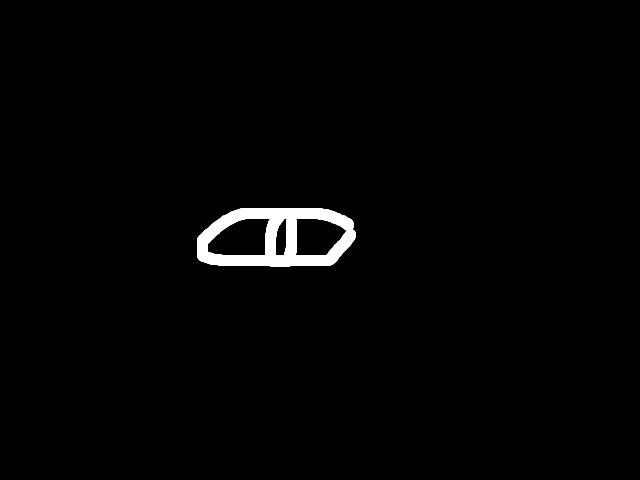

In [21]:
from IPython.display import Image
import cv2
import numpy as np

impath = "/home/mineorpe/testimg.png"
Image(impath)

In [22]:
def classif(fname):
    # ------------ image preprocessing ---------------------
    digit2 = cv2.imread(fname)
    blackboard_gray = cv2.cvtColor(digit2, cv2.COLOR_BGR2GRAY)
    blur1 = cv2.medianBlur(blackboard_gray, 15)
    blur1 = cv2.GaussianBlur(blur1, (5, 5), 0)
    thresh1 = cv2.threshold(blur1, 127, 255, cv2.THRESH_BINARY)[1]
    # -------------- image segmentation----------------------
    blackboard_cnts = cv2.findContours(thresh1.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[0]
    if len(blackboard_cnts) >= 1:
        cnt = max(blackboard_cnts, key=cv2.contourArea)
        # print(cv2.contourArea(cnt))
        if cv2.contourArea(cnt) > 2000:
            x, y, w, h = cv2.boundingRect(cnt)
            digit = blackboard_gray[y:y + h, x:x + w]
            cv2.imwrite("/home/mineorpe/testimg2.png", digit)
            nimg = crop_and_center_image(digit)
            cv2.imwrite("/home/mineorpe/testimg3.png", nimg)



def crop_and_center_image(img):
    h, w = img.shape
    nw = w
    nh = h
    if w > h:
        nh = int(224 / w * h)
        nw = 224
        print(12121)
    else:
        nw = int(224 / h * w)
        nh = 224
    img = cv2.resize(img, (nw, nh))
    iy = (224 - nh) // 2
    ix = (224 - nw) // 2
    nimg = np.zeros((224, 224), dtype=np.uint8)
    nimg[iy:iy + nh, ix:ix + nw] = img
    return nimg

In [23]:
classif(impath)

12121


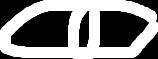

In [24]:
Image("/home/mineorpe/testimg2.png")

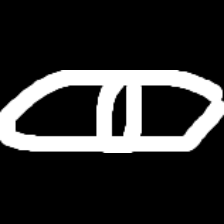

In [25]:
Image("/home/mineorpe/testimg3.png")